**Pre cleaning of microbiome data** 
Preparing 16S data for further analysis such as beta diversity and statistical tests. 
1. add variabel types to meta data
2. filter features/samples that will not be part of any analysis

In [1]:
library(phyloseq)
library(stringr)
library(ggplot2)
suppressMessages(library(microbiome))
source("src/microfiltR/microfiltR_source_code.R")

**Load QIIME2 based taxonomy from phyloseq object (rds file)**

In [3]:
rds <- readRDS(input$physeq)
rds

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 33718 taxa and 175 samples ]
sample_data() Sample Data:       [ 175 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 33718 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 33718 tips and 32059 internal nodes ]
refseq()      DNAStringSet:      [ 33718 reference sequences ]

**Taxonomy requirements**

In [1]:
rds.f <- subset_taxa(rds,
    Kingdom == "Bacteria" &
    Family  != "mitochondria" &
    Class   != "Chloroplast" &
    Phylum != "Cyanobacteria/Chloroplast"
  )
rds.f = prune_taxa(taxa_sums(rds.f) > 0, rds.f)
rds.f


ERROR: Error in subset_taxa(rds, Kingdom == "Bacteria" & Family != "mitochondria" & : could not find function "subset_taxa"


**Independent feature filtes**  
Functions for paramter tuning independent filtering is from Bryan Brown's microfiltR https://github.com/itsmisterbrown/microfiltR

In [6]:
as.threshold <- estimate.ASthreshold(ps=rds.f, WST=1e-5, minLIB=1000, Prange = c(0.025:0.15, 0.025), CVrange = c(1:10, 0.5), RArange = c(5e-6:0.9e-3, 1e-5))

Removing 0 samples with read count < 1000
Applying WS filter threshold of 1e-05
Estimating filtering statistics from relative abundance thresholds 5e-06 to 9e-04 by 1e-05
Estimating filtering statistics from CV thresholds 1 to 10 by 0.5
Estimating filtering statistics from prevalence thresholds 0.025 to 0.15 by 0.025


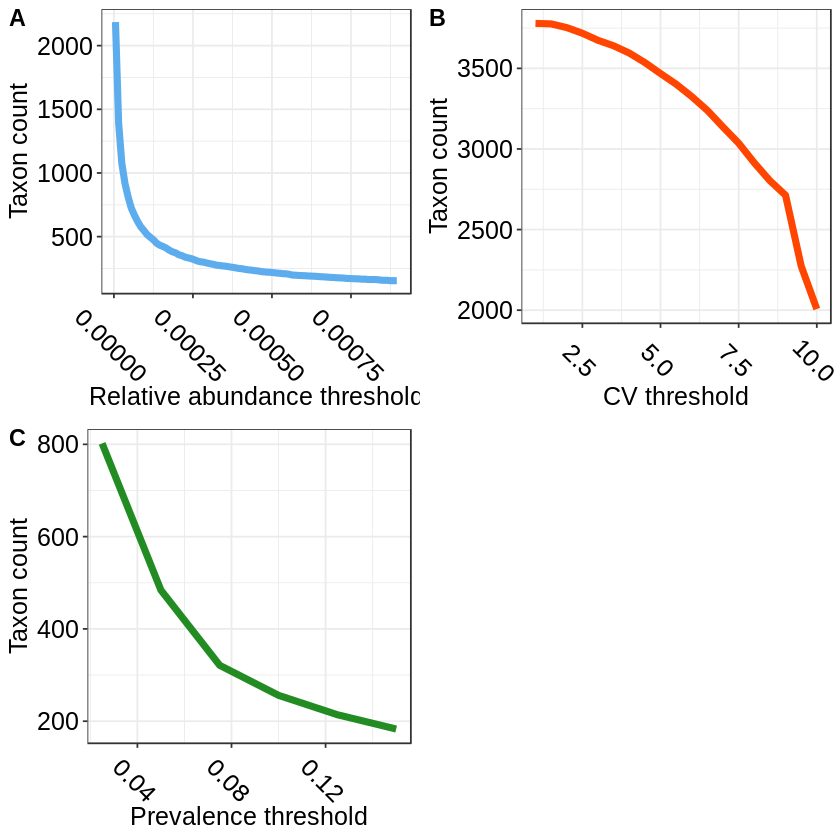

In [7]:
plot.threshold(as.threshold)

In [8]:
e3.f <- microfilter(ps=rds.f, WST=1e-6, PFT=0.05, RAT=0.0001, minLIB=1000, return.all = TRUE)
e3.f$filtered.phyloseq

Removing 0 samples with read count < 1000
Applying WS filter threshold of 1e-06
Applying relative abundance threshold of 1e-04
Applying prevalence threshold of 0.05


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 322 taxa and 175 samples ]
sample_data() Sample Data:       [ 175 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 322 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 322 tips and 315 internal nodes ]
refseq()      DNAStringSet:      [ 322 reference sequences ]

**Identify the core microbiome**

In [9]:
rds.f <- e3.f$filtered.phyloseq

**Save filtered SILVA**

In [10]:
saveRDS(rds.f, output.physeq)

--------

--------------
